<a href="https://colab.research.google.com/github/MonicaaY/B.Intern/blob/main/Task_2_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
#Importing Maruti dataset:
maruti = pd.read_csv("/content/MARUTI.csv")
# View first few lines of training data
maruti.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2003-07-09,MARUTI,EQ,125.00,164.90,170.40,155.00,164.0,164.30,165.95,35164283,5.835528e+14,NaN,8537695.0,0.2428
1,2003-07-10,MARUTI,EQ,164.30,167.00,168.70,164.50,167.0,167.00,166.74,10464179,1.744820e+14,NaN,4363947.0,0.4170
2,2003-07-11,MARUTI,EQ,167.00,167.75,174.85,166.25,173.6,173.35,172.45,11740117,2.024622e+14,NaN,3014852.0,0.2568
3,2003-07-14,MARUTI,EQ,173.35,174.25,179.25,174.25,178.6,177.95,177.91,5982324,1.064313e+14,NaN,1949217.0,0.3258
4,2003-07-15,MARUTI,EQ,177.95,200.00,200.00,173.00,176.3,176.20,176.88,6173689,1.092001e+14,NaN,1307694.0,0.2118


In [ ]:
#Data cleansing
maruti.drop(labels = {'Trades'}, axis = 1,inplace = True)

In [ ]:
maruti.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
0,2003-07-09,MARUTI,EQ,125.00,164.90,170.40,155.00,164.0,164.30,165.95,35164283,5.835528e+14,8537695.0,0.2428
1,2003-07-10,MARUTI,EQ,164.30,167.00,168.70,164.50,167.0,167.00,166.74,10464179,1.744820e+14,4363947.0,0.4170
2,2003-07-11,MARUTI,EQ,167.00,167.75,174.85,166.25,173.6,173.35,172.45,11740117,2.024622e+14,3014852.0,0.2568
3,2003-07-14,MARUTI,EQ,173.35,174.25,179.25,174.25,178.6,177.95,177.91,5982324,1.064313e+14,1949217.0,0.3258
4,2003-07-15,MARUTI,EQ,177.95,200.00,200.00,173.00,176.3,176.20,176.88,6173689,1.092001e+14,1307694.0,0.2118


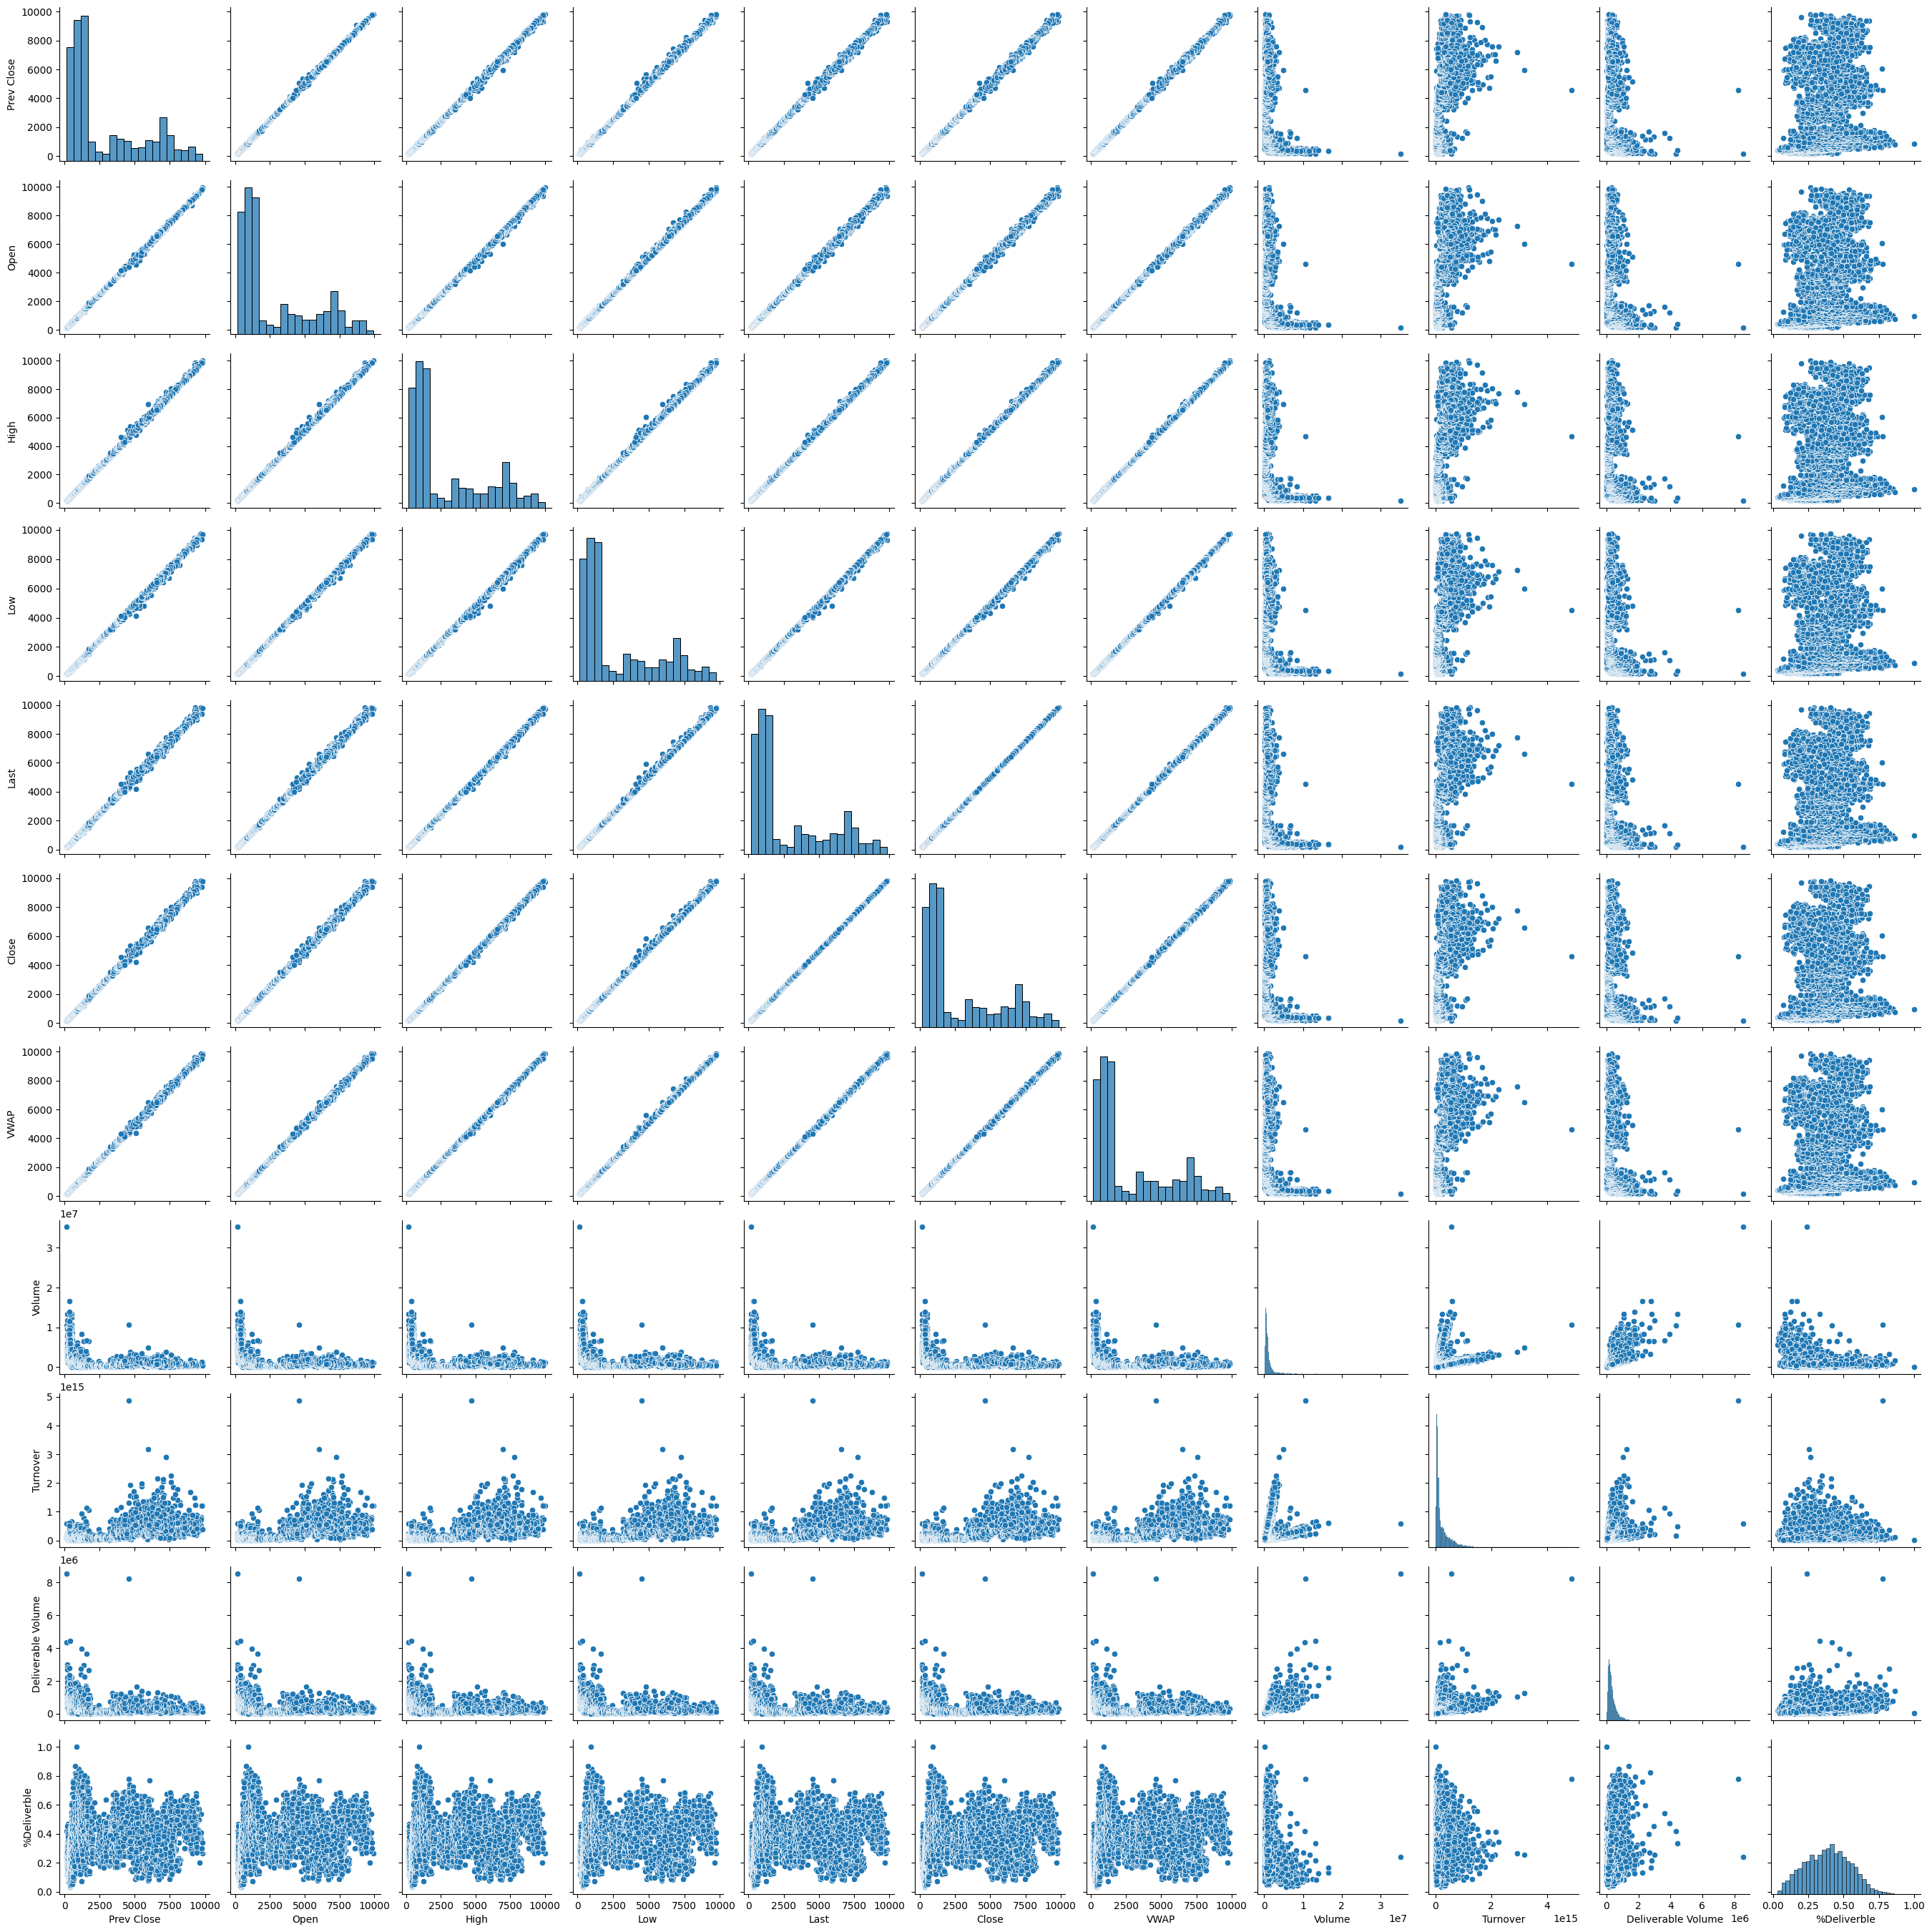

In [ ]:
sns.pairplot(maruti)

In [ ]:
#Printing a concise summary of the DataFrame
maruti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4427 entries, 0 to 4426
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                4427 non-null   object 
 1   Symbol              4427 non-null   object 
 2   Series              4427 non-null   object 
 3   Prev Close          4427 non-null   float64
 4   Open                4427 non-null   float64
 5   High                4427 non-null   float64
 6   Low                 4427 non-null   float64
 7   Last                4427 non-null   float64
 8   Close               4427 non-null   float64
 9   VWAP                4427 non-null   float64
 10  Volume              4427 non-null   int64  
 11  Turnover            4427 non-null   float64
 12  Deliverable Volume  4426 non-null   float64
 13  %Deliverble         4426 non-null   float64
dtypes: float64(10), int64(1), object(3)
memory usage: 484.3+ KB


In [ ]:
maruti['Deliverable Volume'] = maruti['Deliverable Volume'].fillna('ffill')
maruti['%Deliverble'] = maruti['%Deliverble'].fillna('ffill')

In [ ]:
maruti['Profit'] = maruti['Close'] - maruti['Open']

In [ ]:
maruti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4427 entries, 0 to 4426
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                4427 non-null   object 
 1   Symbol              4427 non-null   object 
 2   Series              4427 non-null   object 
 3   Prev Close          4427 non-null   float64
 4   Open                4427 non-null   float64
 5   High                4427 non-null   float64
 6   Low                 4427 non-null   float64
 7   Last                4427 non-null   float64
 8   Close               4427 non-null   float64
 9   VWAP                4427 non-null   float64
 10  Volume              4427 non-null   int64  
 11  Turnover            4427 non-null   float64
 12  Deliverable Volume  4427 non-null   object 
 13  %Deliverble         4427 non-null   object 
 14  Profit              4427 non-null   float64
dtypes: float64(9), int64(1), object(5)
memory usage: 518.9+

In [ ]:
X = maruti[['VWAP','Open', 'High', 'Low', 'Prev Close', 'Volume', 'Profit']]

In [ ]:
y = maruti[['Close']]

In [ ]:
X

,VWAP,Open,High,Low,Prev Close,Volume,Profit
0,165.95,164.90,170.40,155.00,125.00,35164283,-0.60
1,166.74,167.00,168.70,164.50,164.30,10464179,0.00
2,172.45,167.75,174.85,166.25,167.00,11740117,5.60
3,177.91,174.25,179.25,174.25,173.35,5982324,3.70
4,176.88,200.00,200.00,173.00,177.95,6173689,-23.80
...,...,...,...,...,...,...,...
4422,6678.34,6690.20,6789.00,6600.00,6676.10,937344,-51.30
4423,6620.68,6669.95,6709.00,6542.00,6638.90,1610651,-101.20
4424,6598.62,6568.75,6650.00,6545.00,6568.75,1406270,5.05
4425,6580.77,6635.00,6647.45,6552.00,6573.80,757075,-69.35


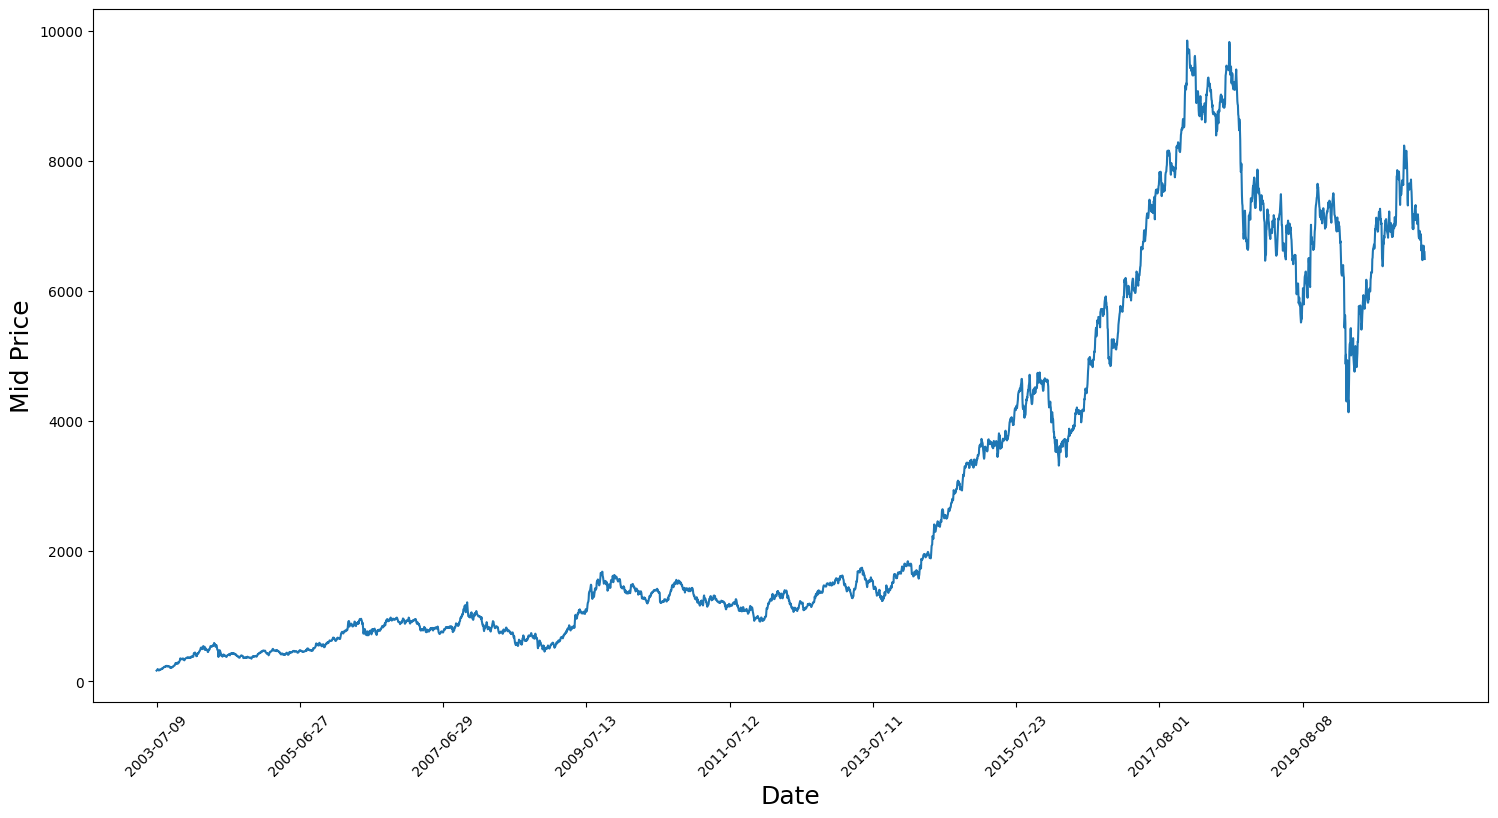

In [ ]:
plt.figure(figsize = (18,9))
plt.plot(range(maruti.shape[0]),(maruti['Low']+maruti['High'])/2.0)
plt.xticks(range(0,maruti.shape[0],500),maruti['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

<Axes: >

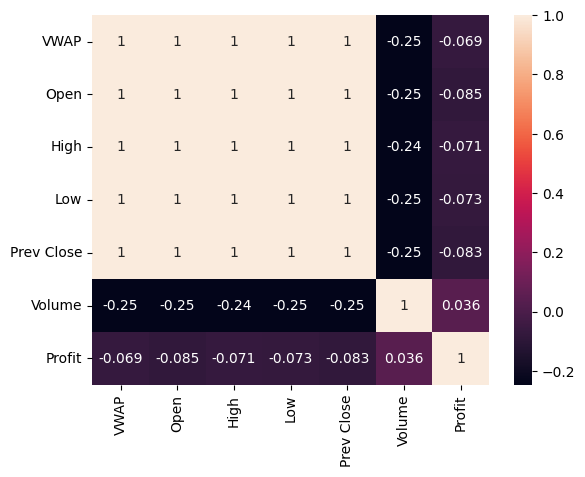

In [ ]:
sns.heatmap(X.corr(), annot = True)

In [ ]:
y

,Close
0,164.30
1,167.00
2,173.35
3,177.95
4,176.20
...,...
4422,6638.90
4423,6568.75
4424,6573.80
4425,6565.65


In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y_scaled,test_size = 0.2)

In [ ]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[0.70761416 0.71250765 0.71026792 ... 0.71706267 0.0318929  0.31976198]
 [0.75340753 0.74861253 0.74942255 ... 0.7678381  0.01859893 0.4439175 ]
 [0.14467215 0.14252193 0.14370606 ... 0.14974581 0.00429487 0.483692  ]
 ...
 [0.09411825 0.09263926 0.09364348 ... 0.09956786 0.01144917 0.48991097]
 [0.78071114 0.77647419 0.77650417 ... 0.78678747 0.02276409 0.42490269]
 [0.5867209  0.56998572 0.58673952 ... 0.57578458 0.05212628 0.61469285]]
[[0.54273119 0.54332789 0.54145426 ... 0.5526065  0.014934   0.40615632]
 [0.05472801 0.05621302 0.05558778 ... 0.0588105  0.03160225 0.47053823]
 [0.06844176 0.06867476 0.06870377 ... 0.07372173 0.02757342 0.46991186]
 ...
 [0.06546423 0.06488472 0.06507626 ... 0.06923548 0.02059645 0.48512371]
 [0.60637008 0.5851867  0.61406026 ... 0.59431159 0.03384069 0.73356897]
 [0.12385529 0.12355642 0.12414909 ... 0.12861256 0.01516325 0.47205942]]
[[0.70338689]
 [0.75434287]
 [0.14445887]
 ...
 [0.09460445]
 [0.78039232]
 [0.59298315]]
[[5.41851337e-01]
 [5.

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3541, 7)
(886, 7)
(3541, 1)
(886, 1)


In [ ]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train,y_train)
print("Training_Score:",model1.score(X_train, y_train)*100)
print("Testing_score :",model1.score(X_test, y_test)*100)

Training_Score: 100.0
Testing_score : 100.0


In [ ]:
import tensorflow as tf
from keras import layers
model = tf.keras.models.Sequential()
model.add(layers.Embedding(input_dim=1000, output_dim=64))
model.add(layers.LSTM(128))
model.add(layers.Dense(10))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          64000     
                                                                 
 lstm (LSTM)                 (None, 128)               98816     
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
Total params: 164106 (641.04 KB)
Trainable params: 164106 (641.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [ ]:
epochs_hist = model.fit(X_train,y_train,epochs = 50, batch_size = 125, validation_split=0.2)

Epoch 1/50
23/23 [==============================] - 4s 59ms/step - loss: 0.1025 - val_loss: 0.0848
Epoch 2/50
23/23 [==============================] - 1s 48ms/step - loss: 0.0812 - val_loss: 0.0827
Epoch 3/50
23/23 [==============================] - 1s 48ms/step - loss: 0.0809 - val_loss: 0.0824
Epoch 4/50
23/23 [==============================] - 1s 46ms/step - loss: 0.0807 - val_loss: 0.0831
Epoch 5/50
23/23 [==============================] - 1s 37ms/step - loss: 0.0811 - val_loss: 0.0828
Epoch 6/50
23/23 [==============================] - 1s 26ms/step - loss: 0.0807 - val_loss: 0.0835
Epoch 7/50
23/23 [==============================] - 1s 27ms/step - loss: 0.0808 - val_loss: 0.0830
Epoch 8/50
23/23 [==============================] - 1s 26ms/step - loss: 0.0810 - val_loss: 0.0823
Epoch 9/50
23/23 [==============================] - 1s 27ms/step - loss: 0.0807 - val_loss: 0.0824
Epoch 10/50
23/23 [==============================] - 1s 26ms/step - loss: 0.0815 - val_loss: 0.0827
Epoch 11/

In [ ]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

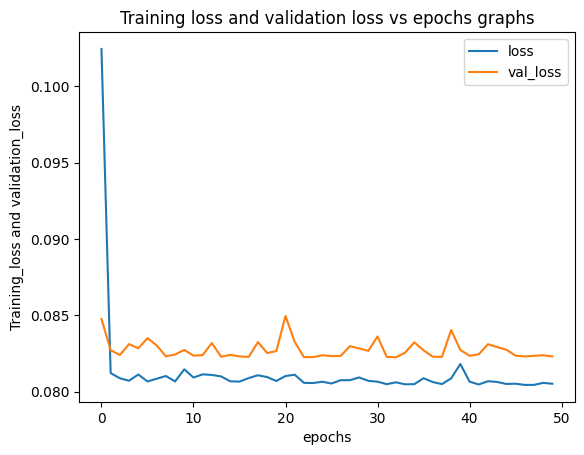

In [ ]:
eh = epochs_hist.history['loss']
eh2 = epochs_hist.history['val_loss']
plt.plot(eh)
plt.plot(eh2)
plt.title('Training loss and validation loss vs epochs graphs')
plt.xlabel('epochs')
plt.ylabel('Training_loss and validation_loss')
plt.legend({'loss', 'val_loss'})

In [ ]:
# using LSTM model
y_predict = model.predict(X_test)

28/28 [==============================] - 1s 5ms/step


In [ ]:
#values predicted byt LSTM model
y_predict

array([[0.28952608, 0.29082465, 0.28958088, ..., 0.28792915, 0.289749  ,
        0.29069263],
       [0.28952608, 0.29082465, 0.28958088, ..., 0.28792915, 0.289749  ,
        0.29069263],
       [0.28952608, 0.29082465, 0.28958088, ..., 0.28792915, 0.289749  ,
        0.29069263],
       ...,
       [0.28952608, 0.29082465, 0.28958088, ..., 0.28792915, 0.289749  ,
        0.29069263],
       [0.28952608, 0.29082465, 0.28958088, ..., 0.28792915, 0.289749  ,
        0.29069263],
       [0.28952608, 0.29082465, 0.28958088, ..., 0.28792915, 0.289749  ,
        0.29069263]], dtype=float32)

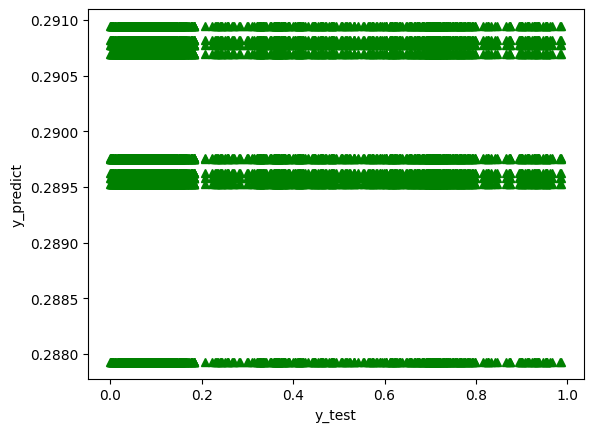

In [ ]:
plt.plot(y_test, y_predict, '^', color = 'g')
plt.xlabel('y_test')
plt.ylabel('y_predict');

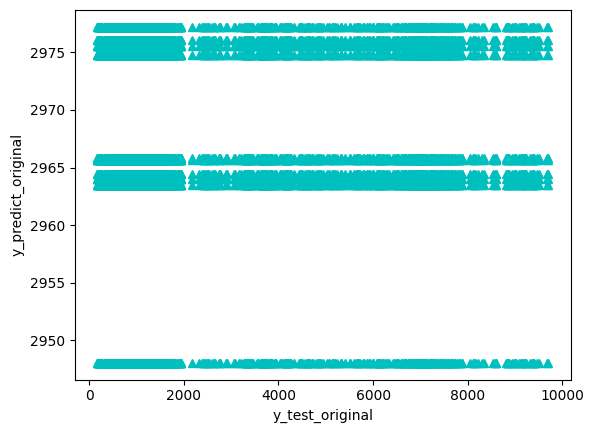

In [ ]:
y_predict_original = scaler.inverse_transform(y_predict)
y_test_original = scaler.inverse_transform(y_test)
plt.plot(y_test_original,y_predict_original, '^', color = 'c');
plt.xlabel('y_test_original')
plt.ylabel('y_predict_original');

In [ ]:
#Using linear regression model
y_predict = model1.predict(X_test)

Text(0, 0.5, 'y_predict')

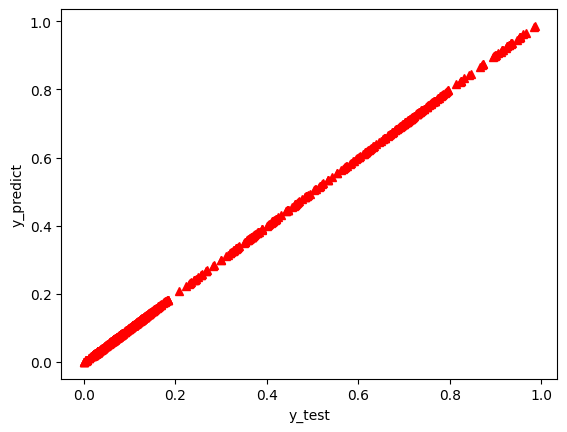

In [ ]:
plt.plot(y_test, y_predict, '^', color = 'r')
plt.xlabel('y_test')
plt.ylabel('y_predict')

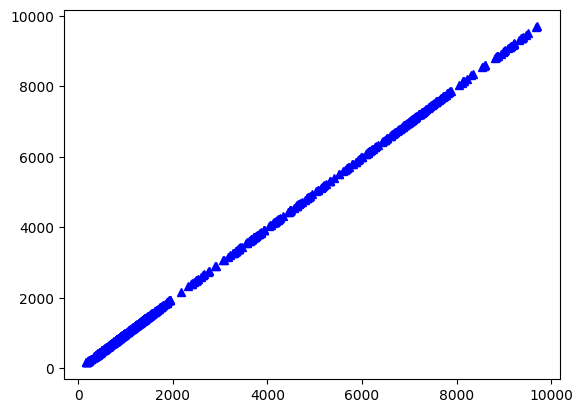

In [ ]:
y_predict_original = scaler.inverse_transform(y_predict)
y_test_original = scaler.inverse_transform(y_test)
plt.plot(y_test_original,y_predict_original, '^', color = 'b')

In [ ]:
k = X_test.shape
n = len(X_test)
print('value of n:',n)

value of n: 886


In [ ]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test_original, y_predict_original)), '0.3f'))
RMSE

0.0

In [ ]:
MSE = mean_squared_error(y_test_original,y_predict_original)
print("Mean_squared_error:",MSE)

Mean_squared_error: 1.7795464347105295e-24


In [ ]:
MAE = mean_absolute_error(y_test_original,y_predict_original)
print("Mean_absolute_error:",MAE)

Mean_absolute_error: 1.1850826314756379e-12


In [ ]:
r2 = r2_score(y_test_original,y_predict_original)
print("r2_score:",(r2*100))

r2_score: 100.0
